# Seoul Bike Trip Duration Prediction:- Modelling

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import math
from math import sqrt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score

In [ ]:
# 10 percentage of Whole Dataset
p = 0.10 
df = pd.read_csv("/content/drive/MyDrive/bike_preprocess_data.csv",
                 header=0,skiprows=lambda i: i>0 and random.random() > p)

In [ ]:
df.shape

(955268, 26)

In [ ]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [ ]:
df["Haversine"] = pd.to_numeric(df["Haversine"],downcast="float")

In [ ]:
df.head(2)

,Haversine,Trip_Duration,Trip_Distance,Pickup_month,Pickup_day,Pickup_hour,Pickup_minute,Pickup_day_of_week,Pickup_Long,Pickup_Latd,Drop_month,Drop_day,Drop_hour,Drop_minute,Drop_day_of_week,Drop_Long,Drop_Latd,Temperature,Percipitation,Windspeed,Humidity,Solar_radiation,Snowfall,Ground_Temperature,One_average_dust
0,3.567644,25,4770,1,1,0,1,0,37.593288,127.036667,1,1,0,27,0,37.582500,126.998535,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
1,2.508075,16,2930,1,1,0,3,0,37.599491,126.916862,1,1,0,20,0,37.620949,126.925636,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


In [ ]:
X = df.drop(columns="Trip_Duration",axis=1)
y = df["Trip_Duration"] 

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_train,X_cv, y_train, y_cv = train_test_split(X_train,y_train, test_size=0.30, random_state=42, stratify=y_train)

In [ ]:
X_train.to_numpy()

array([[5.66907346e-01, 8.20000000e+02, 4.00000000e+00, ...,
        0.00000000e+00, 2.80000000e+00, 6.50000000e+01],
       [7.58589864e-01, 8.50000000e+02, 4.00000000e+00, ...,
        0.00000000e+00, 6.50000000e+00, 6.20000000e+01],
       [3.28588438e+00, 6.41000000e+03, 2.00000000e+00, ...,
        0.00000000e+00, 8.70000000e+00, 4.00000000e+01],
       ...,
       [4.76335096e+00, 6.53000000e+03, 7.00000000e+00, ...,
        0.00000000e+00, 3.06000000e+01, 1.70000000e+01],
       [2.74716878e+00, 3.86000000e+03, 7.00000000e+00, ...,
        0.00000000e+00, 2.61000000e+01, 6.00000000e+00],
       [1.05883229e+00, 1.26000000e+03, 7.00000000e+00, ...,
        0.00000000e+00, 2.38000000e+01, 2.60000000e+01]])

In [ ]:
X_cv.to_numpy()

array([[9.84898925e-01, 1.05000000e+03, 7.00000000e+00, ...,
        0.00000000e+00, 4.44000000e+01, 2.10000000e+01],
       [1.17414737e+00, 1.68000000e+03, 9.00000000e+00, ...,
        0.00000000e+00, 3.85000000e+01, 2.00000000e+01],
       [5.68368196e-01, 4.70000000e+02, 1.10000000e+01, ...,
        0.00000000e+00, 5.70000000e+00, 3.60000000e+01],
       ...,
       [4.63754356e-01, 3.40000000e+02, 4.00000000e+00, ...,
        0.00000000e+00, 1.28000000e+01, 1.10000000e+01],
       [0.00000000e+00, 9.70000000e+02, 1.00000000e+01, ...,
        0.00000000e+00, 3.03000000e+01, 5.80000000e+01],
       [2.36672521e+00, 2.73000000e+03, 9.00000000e+00, ...,
        0.00000000e+00, 2.11000000e+01, 1.20000000e+01]])

In [ ]:
X_test.to_numpy()

array([[3.55923343e+00, 1.74400000e+04, 7.00000000e+00, ...,
        0.00000000e+00, 4.89000000e+01, 5.00000000e+00],
       [2.72005844e+00, 2.88000000e+03, 9.00000000e+00, ...,
        0.00000000e+00, 2.66000000e+01, 9.00000000e+00],
       [1.12195718e+00, 1.67000000e+03, 1.20000000e+01, ...,
        0.00000000e+00, 4.50000000e+00, 3.70000000e+01],
       ...,
       [0.00000000e+00, 6.07000000e+03, 9.00000000e+00, ...,
        0.00000000e+00, 3.90000000e+01, 1.40000000e+01],
       [1.39258611e+00, 2.06000000e+03, 6.00000000e+00, ...,
        0.00000000e+00, 3.36000000e+01, 3.00000000e+01],
       [0.00000000e+00, 7.94000000e+03, 8.00000000e+00, ...,
        0.00000000e+00, 2.96000000e+01, 3.00000000e+01]])

In [ ]:
y_train.to_numpy()

array([ 3,  4, 72, ..., 32, 29, 12])

In [ ]:
y_cv.to_numpy()

array([ 6,  8,  4, ...,  3, 34, 17])

In [ ]:
y_test.to_numpy()

array([ 19,  21,  12, ..., 119,   8,  59])

In [ ]:
print("The shape of X_train: ", X_train.shape) 
print("The shape of X_cv: ",X_cv.shape) 
print("The shape of X_test: ", X_test.shape) 
print("The shape of y_train: ", y_train.shape)  
print("The shape of y_cv: ",y_cv.shape) 
print("The shape of y_test: ", y_test.shape) 

The shape of X_train:  (468080, 24)
The shape of X_cv:  (200607, 24)
The shape of X_test:  (286581, 24)
The shape of y_train:  (468080,)
The shape of y_cv:  (200607,)
The shape of y_test:  (286581,)


# Baseline Model

# Linear Regression

In [ ]:
Linear_reg = LinearRegression()
Linear_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
Linear_reg.get_params

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>

In [ ]:

y_train_pred = Linear_reg.predict(X_train)
y_cv_pred = Linear_reg.predict(X_cv)
y_test_pred = Linear_reg.predict(X_test)

print("*"*50)
print("Train Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_train, y_train_pred)))
print("CV Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_cv, y_cv_pred)))
print("Test Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_test, y_test_pred)))
print("*"*50)
print("Train Mean Absolute error: ",mean_absolute_error(y_train,y_train_pred))
print("CV Mean Absolute error: ",mean_absolute_error(y_cv,y_cv_pred))
print("Test Mean Absolute error: ",mean_absolute_error(y_test,y_test_pred))
print("*"*50) 
print("Train Median Absolute error: ",median_absolute_error(y_train,y_train_pred))
print("CV Median Absolute error: ",median_absolute_error(y_cv,y_cv_pred))
print("Test Median Absolute error: ",median_absolute_error(y_test,y_test_pred))
print("*"*50)
print("Train r2_score error: ",r2_score(y_train,y_train_pred))
print("CV r2_score error: ",r2_score(y_cv,y_cv_pred))
print("Test r2_score error: ",r2_score(y_test,y_test_pred))
print("*"*50)

d = pd.DataFrame({'Actual_Duration': y_test, 'Predicted_Duration': y_test_pred})
d.head(5)

**************************************************
Train Root Mean squared error: 16.49
CV Root Mean squared error: 16.50
Test Root Mean squared error: 16.49
**************************************************
Train Mean Absolute error:  10.12138689701511
CV Mean Absolute error:  10.123920160514242
Test Mean Absolute error:  10.114941669390626
**************************************************
Train Median Absolute error:  6.903840448969014
CV Median Absolute error:  6.895578748102714
Test Median Absolute error:  6.889786375282448
**************************************************
Train r2_score error:  0.5662399948292469
CV r2_score error:  0.5657624796797525
Test r2_score error:  0.5662509088459742
**************************************************


,Actual_Duration,Predicted_Duration
406660,3,10.657245
70069,57,62.563661
665049,11,16.924110
783763,2,6.761295
870142,11,13.358895


# Ensemble Models

# RandomForest

In [ ]:


rf=RandomForestRegressor()
params={'max_depth': [1, 5, 10, 50], 'min_samples_split':[5, 10, 100, 500]}

cross_val=GridSearchCV(estimator=rf, param_grid=params, cv=3,verbose=2,n_jobs=-1)

cross_val.fit(X_train,y_train)

print('='*100)
print('The Best Parameters are : ',cross_val.best_params_)
print('='*100)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 74.0min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 134.6min finished


The Best Parameters are :  {'max_depth': 50, 'min_samples_split': 5}


In [ ]:
rf_best = cross_val.best_estimator_
rf_best.fit(X_train, y_train)

y_train_pred = rf_best.predict(X_train)
y_cv_pred = rf_best.predict(X_cv)
y_test_pred = rf_best.predict(X_test)

print("*"*50)
print("Train Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_train, y_train_pred)))
print("CV Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_cv, y_cv_pred)))
print("Test Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_test, y_test_pred)))
print("*"*50)
print("Train Mean Absolute error: ",mean_absolute_error(y_train,y_train_pred))
print("CV Mean Absolute error: ",mean_absolute_error(y_cv,y_cv_pred))
print("Test Mean Absolute error: ",mean_absolute_error(y_test,y_test_pred))
print("*"*50) 
print("Train Median Absolute error: ",median_absolute_error(y_train,y_train_pred))
print("CV Median Absolute error: ",median_absolute_error(y_cv,y_cv_pred))
print("Test Median Absolute error: ",median_absolute_error(y_test,y_test_pred))
print("*"*50)
print("Train r2_score error: ",r2_score(y_train,y_train_pred))
print("CV r2_score error: ",r2_score(y_cv,y_cv_pred))
print("Test r2_score error: ",r2_score(y_test,y_test_pred))
print("*"*50)

d = pd.DataFrame({'Actual_Duration': y_test, 'Predicted_Duration': y_test_pred})
d.head(5)

**************************************************
Train Root Mean squared error: 4.73
CV Root Mean squared error: 10.39
Test Root Mean squared error: 10.49
**************************************************
Train Mean Absolute error:  2.4684051430599934
CV Mean Absolute error:  5.686895195842361
Test Mean Absolute error:  5.712155709642382
**************************************************
Train Median Absolute error:  1.1702480158730166
CV Median Absolute error:  2.7789075091575164
Test Median Absolute error:  2.7772261904761883
**************************************************
Train r2_score error:  0.9642837488551748
CV r2_score error:  0.8275312492575505
Test r2_score error:  0.8242030547517296
**************************************************


,Actual_Duration,Predicted_Duration
578256,6,7.810321
31216,3,5.637024
397074,5,5.587547
643568,78,78.420164
585024,8,7.148627


No handles with labels found to put in legend.


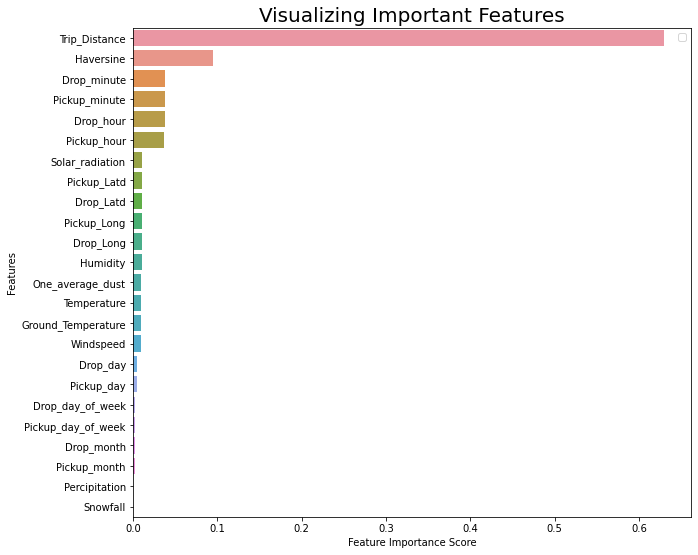

In [ ]:

plt.figure(figsize=(10,9))
feature_imp = pd.Series(rf_best.feature_importances_, index=X.columns).sort_values(ascending=False)

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features", size=20)
plt.legend()
plt.show()

# Decision Tree

In [ ]:
dt=DecisionTreeRegressor()
params={'max_depth': [5, 10,20,30,50], 'min_samples_split':[2,3,5,10,20,50,100]}

dt_cross_val = GridSearchCV(estimator=dt, param_grid=params, cv=3,verbose=2,n_jobs=-1)

dt_cross_val.fit(X_train,y_train)

print('='*100)
print('The Best Parameters are : ',dt_cross_val.best_params_)
print('='*100) 

Fitting 3 folds for each of 35 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:  9.7min finished


The Best Parameters are :  {'max_depth': 20, 'min_samples_split': 100}


In [ ]:
dt_best = dt_cross_val.best_estimator_ 
dt_best.fit(X_train, y_train)

y_train_pred = dt_best.predict(X_train)
y_cv_pred = dt_best.predict(X_cv)
y_test_pred = dt_best.predict(X_test)

print("*"*50)
print("Train Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_train, y_train_pred)))
print("CV Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_cv, y_cv_pred)))
print("Test Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_test, y_test_pred)))
print("*"*50)
print("Train Mean Absolute error: ",mean_absolute_error(y_train,y_train_pred))
print("CV Mean Absolute error: ",mean_absolute_error(y_cv,y_cv_pred))
print("Test Mean Absolute error: ",mean_absolute_error(y_test,y_test_pred))
print("*"*50) 
print("Train Median Absolute error: ",median_absolute_error(y_train,y_train_pred))
print("CV Median Absolute error: ",median_absolute_error(y_cv,y_cv_pred))
print("Test Median Absolute error: ",median_absolute_error(y_test,y_test_pred))
print("*"*50)
print("Train r2_score error: ",r2_score(y_train,y_train_pred))
print("CV r2_score error: ",r2_score(y_cv,y_cv_pred))
print("Test r2_score error: ",r2_score(y_test,y_test_pred))

print(1-(1-r2_score(y_train, y_train_pred))*((len(X_train)-1)/(len(X_train)-X_train.shape[1]-1)))
print(1-(1-r2_score(y_cv, y_cv_pred))*((len(X_cv)-1)/(len(X_cv)- X_cv.shape[1] - 1)))
print(1-(1-r2_score(y_test, y_test_pred))*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1)))


#r_squared_train = r2_score(y_train,y_train_pred)
#r_squared_cv = r2_score(y_cv,y_cv_pred)
#r_squared_test = r2_score(y_test,y_test_pred)
#print(r_squared_train) 

#adjusted_r_squared_train = 1 - (1-r_squared_train)*(len(y)-1)/(len(y)-X.shape[1]-1)
#adjusted_r_squared_cv = 1 - (1-r_squared_cv)*(len(y)-1)/(len(y)-X.shape[1]-1)
#adjusted_r_squared_test = 1 - (1-r_squared_test*(len(y)-1)/(len(y)-X.shape[1]-1)


**************************************************
Train Root Mean squared error: 11.23
CV Root Mean squared error: 13.02
Test Root Mean squared error: 13.00
**************************************************
Train Mean Absolute error:  6.465907462941819
CV Mean Absolute error:  7.340112032646502
Test Mean Absolute error:  7.353951175051641
**************************************************
Train Median Absolute error:  3.241463414634147
CV Median Absolute error:  3.475362318840581
Test Median Absolute error:  3.4782608695652186
**************************************************
Train r2_score error:  0.7983655325310333
CV r2_score error:  0.7290716570196436
Test r2_score error:  0.729920553079464
**************************************************
Train r2_score error:  0.7983655325310333
CV r2_score error:  0.7290716570196436
Test r2_score error:  0.729920553079464
0.798355205475548
0.7290392774035236
0.7298979592214911


No handles with labels found to put in legend.


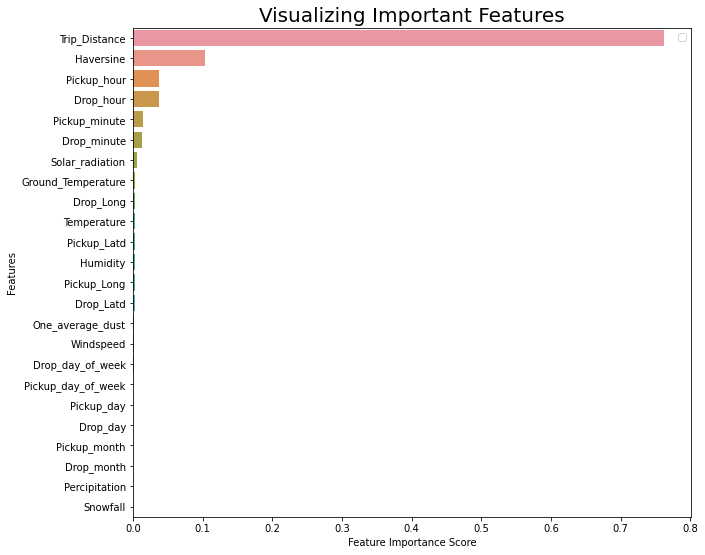

In [ ]:
plt.figure(figsize=(10,9))
feature_imp = pd.Series(dt_best.feature_importances_, index=X.columns).sort_values(ascending=False)

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features", size=20)
plt.legend()
plt.show()

# GBDT

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

max_depth= [1, 2, 3]
learning_rate=[0.001,0.01,1] 

gbdt=GradientBoostingRegressor()
params={'max_depth': [1, 2, 3], 'learning_rate':[0.001,0.01,1]}

grid=GridSearchCV(estimator=gbdt, param_grid=params, cv=3,verbose=2,n_jobs=-1)

grid.fit(X_train,y_train)

print('='*100)
print('The Best Parameters are : ',grid.best_params_)
print('='*100)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 31.2min finished


The Best Parameters are :  {'learning_rate': 1, 'max_depth': 3}


In [ ]:
from sklearn.metrics import r2_score
gbdt_best = grid.best_estimator_
gbdt_best.fit(X_train, y_train)

y_train_pred = gbdt_best.predict(X_train)
y_cv_pred = gbdt_best.predict(X_cv)
y_test_pred = gbdt_best.predict(X_test)

print("*"*50)
print("Train Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_train, y_train_pred)))
print("CV Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_cv, y_cv_pred)))
print("Test Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_test, y_test_pred)))
print("*"*50)
print("Train Mean Absolute error: ",mean_absolute_error(y_train,y_train_pred))
print("CV Mean Absolute error: ",mean_absolute_error(y_cv,y_cv_pred))
print("Test Mean Absolute error: ",mean_absolute_error(y_test,y_test_pred))
print("*"*50) 
print("Train Median Absolute error: ",median_absolute_error(y_train,y_train_pred))
print("CV Median Absolute error: ",median_absolute_error(y_cv,y_cv_pred))
print("Test Median Absolute error: ",median_absolute_error(y_test,y_test_pred))
print("*"*50)
print("Train r2_score error: ",r2_score(y_train,y_train_pred))
print("CV r2_score error: ",r2_score(y_cv,y_cv_pred))
print("Test r2_score error: ",r2_score(y_test,y_test_pred))
print("*"*50)

d = pd.DataFrame({'Actual_Duration': y_test, 'Predicted_Duration': y_test_pred})
d.head(5)

**************************************************
Train Root Mean squared error: 6.74
CV Root Mean squared error: 6.92
Test Root Mean squared error: 6.88
**************************************************
Train Mean Absolute error:  4.176270876136381
CV Mean Absolute error:  4.195389887259278
Test Mean Absolute error:  4.20950943388566
**************************************************
Train Median Absolute error:  2.641925216618098
CV Median Absolute error:  2.6439486001698356
Test Median Absolute error:  2.6603131416873396
**************************************************
Train r2_score error:  0.9274254192232534
CV r2_score error:  0.9234346774166566
Test r2_score error:  0.9244233138181509
**************************************************


,Actual_Duration,Predicted_Duration
361515,19,47.416280
592123,21,17.873431
948147,12,9.422462
68393,45,46.131421
215444,56,51.375888


No handles with labels found to put in legend.


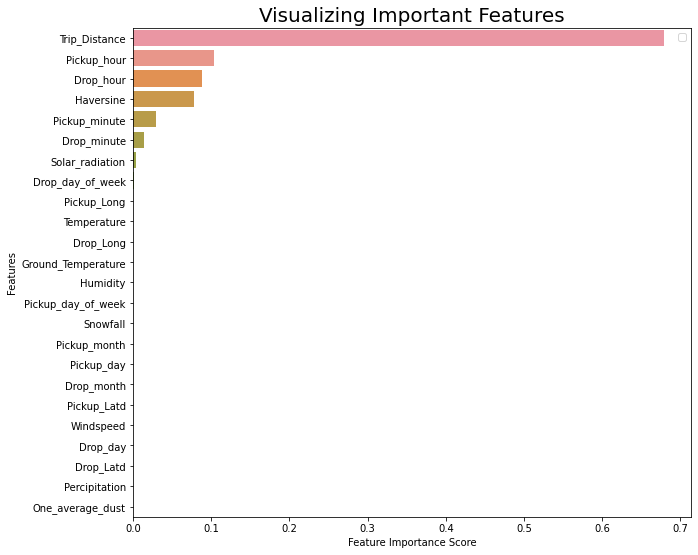

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,9))
feature_imp = pd.Series(gbdt_best.feature_importances_, index=X.columns).sort_values(ascending=False)

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features", size=20)
plt.legend()
plt.show()

# Xgboost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

max_depth= [1, 2, 3]
learning_rate=[0.001,0.01,1]

xgb= xgb.XGBRegressor(gamma = 0.001, booster="gbtree")
params= {'max_depth': [1, 2, 3], 
         'learning_rate':[0.001,0.01,1],
         "n_estimators": [1,5,50,100]}

grid_xgb=GridSearchCV(estimator=xgb,param_grid = params, cv=3,verbose=2,n_jobs=-1)

grid_xgb.fit(X_train,y_train)

print('='*100)
print('The Best Parameters are : ',grid_xgb.best_params_)
print('='*100)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 14.5min finished


[14:22:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The Best Parameters are :  {'learning_rate': 1, 'max_depth': 3, 'n_estimators': 100}


In [ ]:
xgb_best = grid_xgb.best_estimator_
xgb_best.fit(X_train, y_train)

y_train_pred = xgb_best.predict(X_train)
y_cv_pred = xgb_best.predict(X_cv)
y_test_pred = xgb_best.predict(X_test)

print("*"*50)
print("Train Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_train, y_train_pred)))
print("CV Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_cv, y_cv_pred)))
print("Test Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_test, y_test_pred)))
print("*"*50)
print("Train Mean Absolute error: ",mean_absolute_error(y_train,y_train_pred))
print("CV Mean Absolute error: ",mean_absolute_error(y_cv,y_cv_pred))
print("Test Mean Absolute error: ",mean_absolute_error(y_test,y_test_pred))
print("*"*50) 
print("Train Median Absolute error: ",median_absolute_error(y_train,y_train_pred))
print("CV Median Absolute error: ",median_absolute_error(y_cv,y_cv_pred))
print("Test Median Absolute error: ",median_absolute_error(y_test,y_test_pred))
print("*"*50)
print("*"*50)
print("Train r2_score error: ",r2_score(y_train,y_train_pred))
print("CV r2_score error: ",r2_score(y_cv,y_cv_pred))
print("Test r2_score error: ",r2_score(y_test,y_test_pred))
print("*"*50)

d = pd.DataFrame({'Actual_Duration': y_test, 'Predicted_Duration': y_test_pred})
d.head(5)

[14:23:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
**************************************************
Train Root Mean squared error: 7.04
CV Root Mean squared error: 7.16
Test Root Mean squared error: 7.13
**************************************************
Train Mean Absolute error:  4.431660985133917
CV Mean Absolute error:  4.450942080018896
Test Mean Absolute error:  4.455981853723066
**************************************************
Train Median Absolute error:  2.863410472869873
CV Median Absolute error:  2.8777809143066406
Test Median Absolute error:  2.8766846656799316
**************************************************
**************************************************
Train r2_score error:  0.9209140236062302
CV r2_score error:  0.9180718442745103
Test r2_score error:  0.9188656354851854
**************************************************


,Actual_Duration,Predicted_Duration
361515,19,49.085014
592123,21,16.180172
948147,12,7.929701
68393,45,45.089684
215444,56,44.710499


No handles with labels found to put in legend.


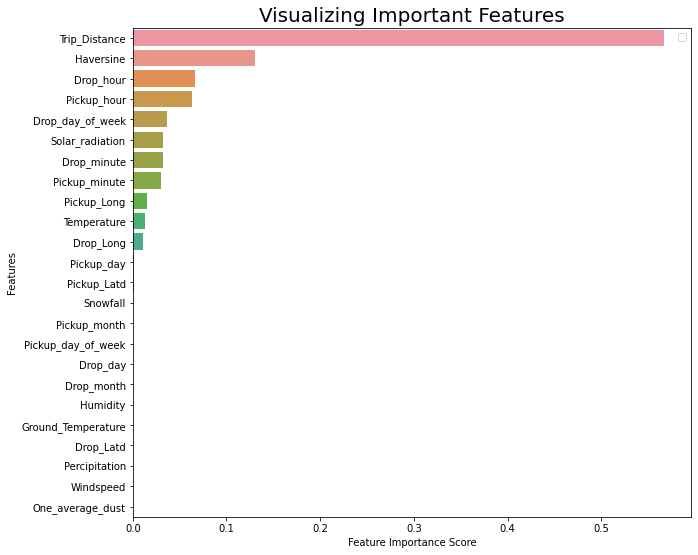

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,9))
feature_imp = pd.Series(xgb_best.feature_importances_, index=X.columns).sort_values(ascending=False)

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features", size=20)
plt.legend()
plt.show()

# LGBM

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

lgbm = LGBMRegressor(class_weight="balanced")
params= {'max_depth': [1, 2, 3], 
         'learning_rate':[0.001,0.01,1],
         "n_estimators": [1,5,50,100]}

grid_lgbm=GridSearchCV(estimator=xgb,param_grid = params, cv=3,verbose=2,n_jobs=-1)

grid_lgbm.fit(X_train,y_train)

print('='*100)
print('The Best Parameters are : ',grid_lgbm.best_params_)
print('='*100)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 14.6min finished


[14:49:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The Best Parameters are :  {'learning_rate': 1, 'max_depth': 3, 'n_estimators': 100}


In [ ]:
lgbm_best = grid_lgbm.best_estimator_
lgbm_best.fit(X_train, y_train)

y_train_pred = lgbm_best.predict(X_train)
y_cv_pred = lgbm_best.predict(X_cv)
y_test_pred = lgbm_best.predict(X_test)

print("*"*50)
print("Train Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_train, y_train_pred)))
print("CV Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_cv, y_cv_pred)))
print("Test Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_test, y_test_pred)))
print("*"*50)
print("Train Mean Absolute error: ",mean_absolute_error(y_train,y_train_pred))
print("CV Mean Absolute error: ",mean_absolute_error(y_cv,y_cv_pred))
print("Test Mean Absolute error: ",mean_absolute_error(y_test,y_test_pred))
print("*"*50) 
print("Train Median Absolute error: ",median_absolute_error(y_train,y_train_pred))
print("CV Median Absolute error: ",median_absolute_error(y_cv,y_cv_pred))
print("Test Median Absolute error: ",median_absolute_error(y_test,y_test_pred))
print("*"*50)
print("*"*50)
print("Train r2_score error: ",r2_score(y_train,y_train_pred))
print("CV r2_score error: ",r2_score(y_cv,y_cv_pred))
print("Test r2_score error: ",r2_score(y_test,y_test_pred))
print("*"*50)

d = pd.DataFrame({'Actual_Duration': y_test, 'Predicted_Duration': y_test_pred})
d.head(5)

[14:50:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
**************************************************
Train Root Mean squared error: 7.04
CV Root Mean squared error: 7.16
Test Root Mean squared error: 7.13
**************************************************
Train Mean Absolute error:  4.431660985133917
CV Mean Absolute error:  4.450942080018896
Test Mean Absolute error:  4.455981853723066
**************************************************
Train Median Absolute error:  2.863410472869873
CV Median Absolute error:  2.8777809143066406
Test Median Absolute error:  2.8766846656799316
**************************************************
**************************************************
Train r2_score error:  0.9209140236062302
CV r2_score error:  0.9180718442745103
Test r2_score error:  0.9188656354851854
**************************************************


,Actual_Duration,Predicted_Duration
361515,19,49.085014
592123,21,16.180172
948147,12,7.929701
68393,45,45.089684
215444,56,44.710499


# Save Model

In [ ]:
import joblib

In [ ]:
with open("/content/drive/MyDrive/final_features.joblib", 'wb') as ft:
    joblib.dump(feature_columns, ft, compress=3)

In [ ]:
with open("/content/drive/MyDrive/final_model_best.joblib", 'wb') as x:
    joblib.dump(gbdt_best, x, compress=3)